In [96]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6427031 .csv')
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6486029.csv')
# df = pandas.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/player-6607011.csv')
df = pd.read_csv('/Users/wiggles/Desktop/DATAFEST2022/DA DRIVE/data files/logs.csv')

/Users/wiggles/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34,38,39,40,47,50,53,54,57,58,59,60,62,68,70,72,73,74,76,77,78,81,85,88,89,90,91,92,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,118,120,121,122,123,129,131) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Our goal is to find a weak spot in the game that would expl

In [5]:
dfByPlayer = []
for i in set(df['player_id']):
    dfByPlayer.append(df[df['player_id'] == i])



In [6]:
dfByPlayer[0]


,row_id,player_id,school,wave,session,date,event_id,event_description,event_category,event_time,...,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
814840,814841,6486016,647,Fall (Wave 1) 2013,Session 1,2013-11-08,600,Player selects age,Avatar Creation,4S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814841,814842,6486016,647,Fall (Wave 1) 2013,Session 1,2013-11-08,601,Player selects gender,Avatar Creation,7S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814842,814843,6486016,647,Fall (Wave 1) 2013,Session 1,2013-11-08,602,Player commits to age and gender,Avatar Creation,8S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814843,814844,6486016,647,Fall (Wave 1) 2013,Session 1,2013-11-08,603,Player selects avatar,Avatar Creation,17S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814844,814845,6486016,647,Fall (Wave 1) 2013,Session 1,2013-11-08,604,Player commits to avatar and name,Avatar Creation,23S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823474,823475,6486016,647,Fall (Wave 1) 2013,Session 8,2013-12-13,507,Player chooses opponent's attack strategy,Refuse Power Minigame,149H 16M 49S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823475,823476,6486016,647,Fall (Wave 1) 2013,Session 8,2013-12-13,508,Player hits continue arrow after selecting opp...,Refuse Power Minigame,149H 16M 51S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823476,823477,6486016,647,Fall (Wave 1) 2013,Session 8,2013-12-13,509,Player selects their own attack strategy,Refuse Power Minigame,149H 16M 53S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823477,823478,6486016,647,Fall (Wave 1) 2013,Session 8,2013-12-13,1002,Player exits game through top bar back arrow,Minigame General,149H 16M 55S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
wordchoice = []
for i in dfByPlayer:
    wordchoice.append(set(i['old_label']))

In [8]:
w = []
for i in wordchoice:
    w.append([x for x in i if type(x) == str])

In [10]:
for i in w:
    print(i)

['my cousin', 'happy', 'driving around', 'bike riding', 'family']
[]
['be a polec', 'nice car', 'my dad']
['cookie', 'math', 'engeneer', 'constru']
['L.A', 'caring', 'florida', 'love music', 'football', 'New York', 'some where fun', 'hyper', 'gaming', 'reading', 'toyotas']
[]
[]
['funny']
['cooking']
[]
[]
[]
[]
[]
['weird']
['careing person', 'nice', 'being smart', 'fun yo be arou', 'get that weigh']
['amusement park', 'electronics', 'animals', 'games']
['flordia', 'tired']
['excersise', 'yorkie']
['sad']
[]
['i love shoes', 'my niece', 'fruits', 'huskey', 'music', 'the ocean', 'cosmatoligest', 'arts', 'this car', 'food', 'on flat land', 'artist', 'photagraphy']
[]
['dog', 'happy', 'animals']
['colors', 'cool']
['nerologists', 'family', 'fashion', 'dua', 'amazing', 'quran']
['js40', 'good', 'tty', 'food', 'agol', 'lol', 'jose', '12131415161718', 'fuck bitch', 'fuck', 'game', 'bitch', 'cool', 'kill', 'i', 'salsiiiiiiiiii', 'car', '21', 'bitc', 'fune', 'flrofi b mckck']
['one kid', 'coo

In [19]:
mask = []
for i in w:
    if len(i) == 0:
        mask.append(False)
    else:
        mask.append(True)
    

In [20]:
mask

[True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 T

In [21]:
caregroup = []
notcaregroup = []
for i in range(len(mask)):
    if(mask[i] == True):
        caregroup.append(dfByPlayer[i])
    else:
        notcaregroup.append(dfByPlayer[i])

In [22]:
len(caregroup)

121

In [23]:
len(notcaregroup)

45

In [29]:
caregroup[0]['event_time_dbl'].max()

537415

In [31]:
totaltime = 0
for i in caregroup:
    totaltime += i['event_time_dbl'].max()
print(totaltime/len(caregroup))

198150.81818181818


In [32]:
totaltime = 0
for i in notcaregroup:
    totaltime += i['event_time_dbl'].max()
print(totaltime/len(notcaregroup))

209179.93333333332


In [100]:
totalminigametimelist = []
for i in notcaregroup:
    startflag = False
    start = 0
    stop = 0
    totalminigametime = 0
    for index, row in i.iterrows():
        if((row['event_category'] == "Knowledge Minigame") or (row['event_category'] == "Minigame General")) and (startflag == False):
            start = row['event_time_dbl']
            startflag = True
        if((row['event_category'] != "Knowledge Minigame") and (row['event_category'] != "Minigame General")) and (startflag == True):
            stop = row['event_time_dbl']
            totalminigametime =  totalminigametime + (stop - start)
            startflag = False
    totalminigametimelist.append(totalminigametime)


(array([40.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([     0. ,  60962.2, 121924.4, 182886.6, 243848.8, 304811. ,
        365773.2, 426735.4, 487697.6, 548659.8, 609622. ]),
 <BarContainer object of 10 artists>)

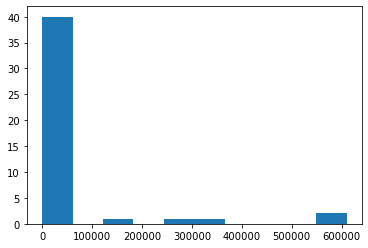

In [101]:
plt.hist(totalminigametimelist)


In [102]:
totalminigametimelist = []
for i in caregroup:
    totalminigametime = 0
    startflag = False
    start = 0
    stop = 0
    for index, row in i.iterrows():
        if((row['event_category'] == "Knowledge Minigame") or (row['event_category'] == "Minigame General")) and (startflag == False):
            start = row['event_time_dbl']
            startflag = True
        if((row['event_category'] != "Knowledge Minigame") and (row['event_category'] != "Minigame General")) and (startflag == True):
            stop = row['event_time_dbl']
            totalminigametime =  totalminigametime + (stop - start)
            startflag = False
    totalminigametimelist.append(totalminigametime)


(array([115.,   3.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([1.7300000e+02, 1.2985260e+05, 2.5953220e+05, 3.8921180e+05,
        5.1889140e+05, 6.4857100e+05, 7.7825060e+05, 9.0793020e+05,
        1.0376098e+06, 1.1672894e+06, 1.2969690e+06]),
 <BarContainer object of 10 artists>)

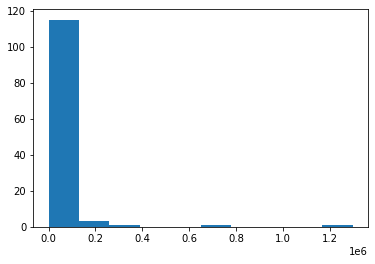

In [103]:
plt.hist(totalminigametimelist)


In [104]:
totalminigametimelist

[17202,
 261916,
 8046,
 7876,
 8580,
 4698,
 8064,
 2068,
 7933,
 6331,
 9726,
 8373,
 13106,
 8326,
 8050,
 6478,
 5010,
 15863,
 13195,
 13018,
 6828,
 10260,
 9370,
 1251,
 7059,
 10436,
 9885,
 7767,
 8383,
 12773,
 8170,
 3402,
 4636,
 9621,
 4785,
 4902,
 5296,
 7385,
 10206,
 7401,
 11133,
 7707,
 12423,
 187154,
 5500,
 6967,
 9313,
 6419,
 9432,
 11019,
 7440,
 6800,
 8370,
 1296969,
 7011,
 8461,
 668861,
 7629,
 453,
 7425,
 5687,
 10715,
 12366,
 8869,
 9720,
 9677,
 4466,
 5240,
 6618,
 11854,
 9141,
 6213,
 7259,
 6895,
 4211,
 4058,
 3728,
 4760,
 11536,
 7815,
 173,
 7389,
 3550,
 4232,
 6372,
 8432,
 2232,
 6546,
 176280,
 9778,
 5045,
 9376,
 5649,
 7736,
 7221,
 6704,
 7123,
 2984,
 7115,
 175466,
 1367,
 9504,
 4379,
 6474,
 8860,
 8546,
 8548,
 3195,
 9886,
 7748,
 12762,
 7170,
 5871,
 7625,
 6491,
 6047,
 10077,
 10228,
 3252,
 8245,
 10346]